# Image Processing - Homework #3
## Edge Detection
    1. 2nd derivative Edge Detector
    2. Canny Edge Detector

## METHOD #1. 2nd derivative Edge Detector

(<matplotlib.text.Text at 0x10d334550>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

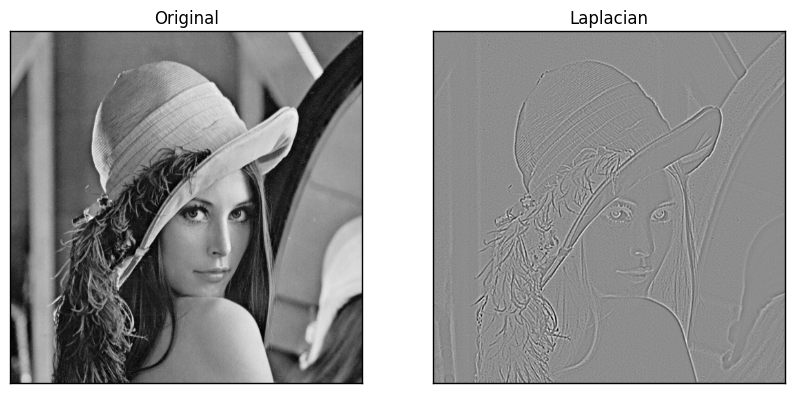

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# loading image
img0 = cv2.imread('Lenna.png',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=1)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

In [2]:
sz=3
window = np.ones((sz,sz)) / (sz*sz)

In [3]:
window

array([[ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111]])

In [4]:
temp_img = laplacian.astype('float32')
mu = cv2.filter2D(src=temp_img, kernel=window, ddepth=-1)
II = cv2.filter2D(src=temp_img**2, kernel=window, ddepth=-1)

In [5]:
Lvar = II - (mu**2)

In [6]:
Lvar = Lvar.astype('uint16')

In [7]:
boundry = np.array(laplacian)
mn = np.mean(Lvar)
for i in range(512):
    for j in range(512):
        if Lvar[i][j] < mn:
            boundry[i][j]=0
boundry

array([[  0.,   0.,   0., ...,   0.,   4.,  20.],
       [  0.,   0.,   0., ...,   0.,   4.,  20.],
       [  0.,   0.,   0., ..., -10.,   4.,  20.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

(<matplotlib.text.Text at 0x10d3c1f28>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

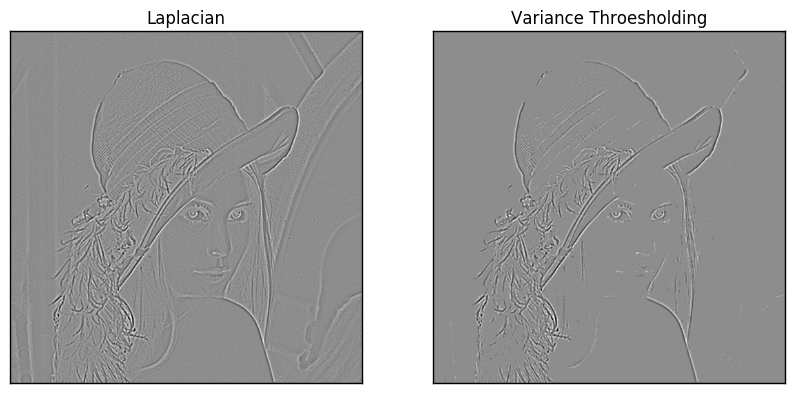

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1),plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(boundry, cmap='gray')
plt.title('Variance Throesholding'), plt.xticks([]), plt.yticks([])

## METHOD #2. Canny Edge Detector

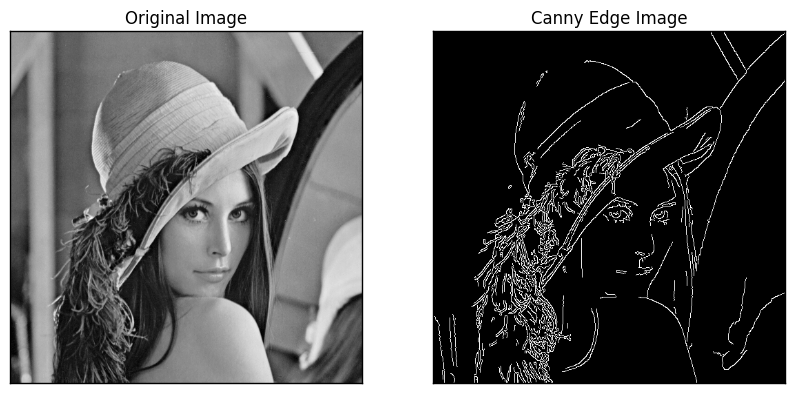

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Lenna.png',0)
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()